## Cluster Evaluation

Usually, clustering dataset does not gave target label, which means clustering is unsupervised learning. This is big difference between classification.  
Then how can we evaluate cluster?

### Introduction to Silhouette Analysis

Silhouette Analysis: Evaluate how efficiently each clusters are sepereated.  
Silhouette Coefficient(s(i)): Indicator that represents distance between in-cluster data and out-cluster data  
a(i) = average of in-cluster data distances  
b(i) = average of the closest out-cluster data distances  
s(i) = (b(i)-a(i)) / max(a(i),b(i))  
s(i) takes (-1,1) value and if s(i) is close to 0, it means data is close to the closest out-cluster

sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds):  
input X feature dataset and cluster label data, return silhouette coef.  

sklearn.metrics.silhouette_scores(X, labels, metric='euclidean', **kwds):  
input X feature dataset and cluster label data, return average of silhouette coef.s

Two condition for good clustering  
1. Average of silhouette scores is close to 1  
2. Mean values of each clusters' silhouette scores have low varinace.

### Cluster Evaluation with Iris data Clustering

In [164]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [165]:
data = pd.read_csv('re_train.csv')
X_data = data.drop(['Unnamed: 0', 'credit'], axis=1)
y_data = data['credit']

In [166]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         12740 non-null  object 
 1   car            12740 non-null  object 
 2   reality        12740 non-null  object 
 3   child_num      12740 non-null  int64  
 4   income_total   12740 non-null  float64
 5   income_type    12740 non-null  object 
 6   edu_type       12740 non-null  object 
 7   family_type    12740 non-null  object 
 8   house_type     12740 non-null  object 
 9   DAYS_BIRTH     12740 non-null  int64  
 10  DAYS_EMPLOYED  12740 non-null  int64  
 11  FLAG_MOBIL     12740 non-null  int64  
 12  work_phone     12740 non-null  int64  
 13  phone          12740 non-null  int64  
 14  email          12740 non-null  int64  
 15  occyp_type     12740 non-null  object 
 16  family_size    12740 non-null  int64  
 17  begin_month    12740 non-null  int64  
dtypes: flo

In [167]:
X_cat = X_data[['gender','car','reality','income_type','edu_type','family_type','house_type','work_phone','phone','occyp_type','email']]
X_num = X_data[['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']]

X_num.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
0,0,202500.0,-19031,1,2,-53
1,1,157500.0,-15773,-309,3,-26
2,0,135000.0,-13483,-1816,2,-9
3,2,112500.0,-12270,-150,4,-12
4,1,225000.0,-16175,-2371,3,-3


In [168]:
from sklearn.preprocessing import StandardScaler

X_num_col = X_num.columns
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(data=X_num_scaled, columns=X_num_col)
X_num_scaled

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
0,-0.577905,0.144774,-0.731343,0.927734,-0.211939,-1.620797
1,0.772023,-0.305218,0.044245,0.796054,0.887006,0.008226
2,-0.577905,-0.530214,0.589394,0.155919,-0.211939,1.033908
3,2.121952,-0.755209,0.878157,0.863593,1.985951,0.852905
4,0.772023,0.369769,-0.051454,-0.079831,0.887006,1.395913
...,...,...,...,...,...,...
12735,-0.577905,-0.080222,1.284757,-0.393315,-0.211939,0.008226
12736,-0.577905,0.369769,-1.118422,-1.467146,-1.310884,-1.017455
12737,-0.577905,-0.530214,0.317534,-2.397402,-0.211939,-0.474448
12738,0.772023,-0.305218,1.257619,-0.060716,0.887006,0.611568


In [169]:
from kmodes.kprototypes import KPrototypes

X_data = pd.concat((X_num_scaled, X_cat), axis=1)

kproto = KPrototypes(n_clusters=4, init='Cao')
clusters = kproto.fit_predict(X_data, categorical = [6,7,8,9,10,11,12,13,14,15,16])

In [170]:
#join data with labels 
labels = pd.DataFrame(clusters)
X_labeled = pd.concat((X_num, X_cat, labels),axis=1)
X_labeled = X_labeled.rename({0:'cluster_label'},axis=1)
X_labeled

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender,car,reality,income_type,edu_type,family_type,house_type,work_phone,phone,occyp_type,email,cluster_label
0,0,202500.0,-19031,1,2,-53,F,Y,Y,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,No,0,2
1,1,157500.0,-15773,-309,3,-26,F,N,N,Working,Higher education,Married,House / apartment,0,1,Sales staff,0,3
2,0,135000.0,-13483,-1816,2,-9,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,1,1,Laborers,0,0
3,2,112500.0,-12270,-150,4,-12,F,Y,N,Working,Secondary / secondary special,Married,House / apartment,0,1,Security staff,0,3
4,1,225000.0,-16175,-2371,3,-3,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,0,0,Drivers,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,0,180000.0,-10562,-3109,2,-26,F,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,Accountants,0,0
12736,0,225000.0,-20657,-5637,1,-43,F,N,N,Working,Secondary / secondary special,Widow,House / apartment,0,0,Accountants,0,1
12737,0,135000.0,-14625,-7827,2,-34,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,0,1,Unknown,1,1
12738,1,157500.0,-10676,-2326,3,-16,M,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,Laborers,1,3


In [172]:
def preprocessing(X_data):
    
    X_data['gender'] = X_data['gender'].apply(lambda x: 0 if x == 'F' else 1)
    X_data['car'] = X_data['car'].apply(lambda x: 0 if x == 'N' else 1)
    X_data['reality'] = X_data['reality'].apply(lambda x: 0 if x == 'N' else 1)
    X_data = pd.get_dummies(X_data, columns=['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'cluster_label'])

    return X_data

X_labeled = preprocessing(X_labeled)
X_labeled

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender,car,reality,work_phone,...,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff,cluster_label_0,cluster_label_1,cluster_label_2,cluster_label_3
0,0,202500.0,-19031,1,2,-53,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,157500.0,-15773,-309,3,-26,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,135000.0,-13483,-1816,2,-9,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,2,112500.0,-12270,-150,4,-12,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,225000.0,-16175,-2371,3,-3,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,0,180000.0,-10562,-3109,2,-26,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
12736,0,225000.0,-20657,-5637,1,-43,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
12737,0,135000.0,-14625,-7827,2,-34,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
12738,1,157500.0,-10676,-2326,3,-16,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
X_labeled.to_csv('cluster.csv')

## Clustering With K-Means

In [142]:
X_data = preprocessing(X_data)
X_data.head()

In [143]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_data)

X_cluster = X_data.copy()
X_cluster['cluster'] = kmeans.labels_

# Calculate Silhouette Coef for every data 
score_samples = silhouette_samples(X_data, X_cluster['cluster'])
print('Shape of silhouette_samples return value' , score_samples.shape)

X_cluster['silhouette_coeff'] = score_samples

# Average Silhouette Coef > Silhoutte Score
average_score = silhouette_score(X_data, X_cluster['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

X_cluster.head()

Shape of silhouette_samples return value (12740,)
Silhouette Analysis Score:0.153


,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender,car,reality,work_phone,...,occyp_type_No,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Unknown,occyp_type_Waiters/barmen staff,cluster,silhouette_coeff
0,-0.577905,0.144774,-0.731343,0.927734,-0.211939,-1.620797,1,1,1,0,...,1,0,0,0,0,0,0,0,2,0.316339
1,0.772023,-0.305218,0.044245,0.796054,0.887006,0.008226,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0.137343
2,-0.577905,-0.530214,0.589394,0.155919,-0.211939,1.033908,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0.122467
3,2.121952,-0.755209,0.878157,0.863593,1.985951,0.852905,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0.310888
4,0.772023,0.369769,-0.051454,-0.079831,0.887006,1.395913,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0.117973


In [144]:
# Silhouette Coef.s of Cluster 0 are close to 0.8 but Silhouette Score is 0.55 which is less than 0.8
# Check other Clusters' Silhouette Coef.s using groupby()
X_cluster.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.067102
1    0.180796
2    0.364249
Name: silhouette_coeff, dtype: float64

### Find Optimal # of Cluster by Visualize Average Silhouette Coefs. of each Clusters

Sklearn Document for visualize Silhouette Analysis:  
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.18319643505396854
For n_clusters = 3 The average silhouette_score is : 0.15331321185874688
For n_clusters = 4 The average silhouette_score is : 0.160423977779465
For n_clusters = 5 The average silhouette_score is : 0.16461354189504931
For n_clusters = 6 The average silhouette_score is : 0.1542766841813319
For n_clusters = 7 The average silhouette_score is : 0.14480023877651024
For n_clusters = 8 The average silhouette_score is : 0.13258694840932952
For n_clusters = 9 The average silhouette_score is : 0.11450413717767191
For n_clusters = 10 The average silhouette_score is : 0.10961014279370396
For n_clusters = 11 The average silhouette_score is : 0.10957081796983435
For n_clusters = 12 The average silhouette_score is : 0.1062393911476436
For n_clusters = 13 The average silhouette_score is : 0.10649359521920168
For n_clusters = 14 The average silhouette_score is : 0.10819353464555183
For n_clusters = 15 The average silhouette_score i

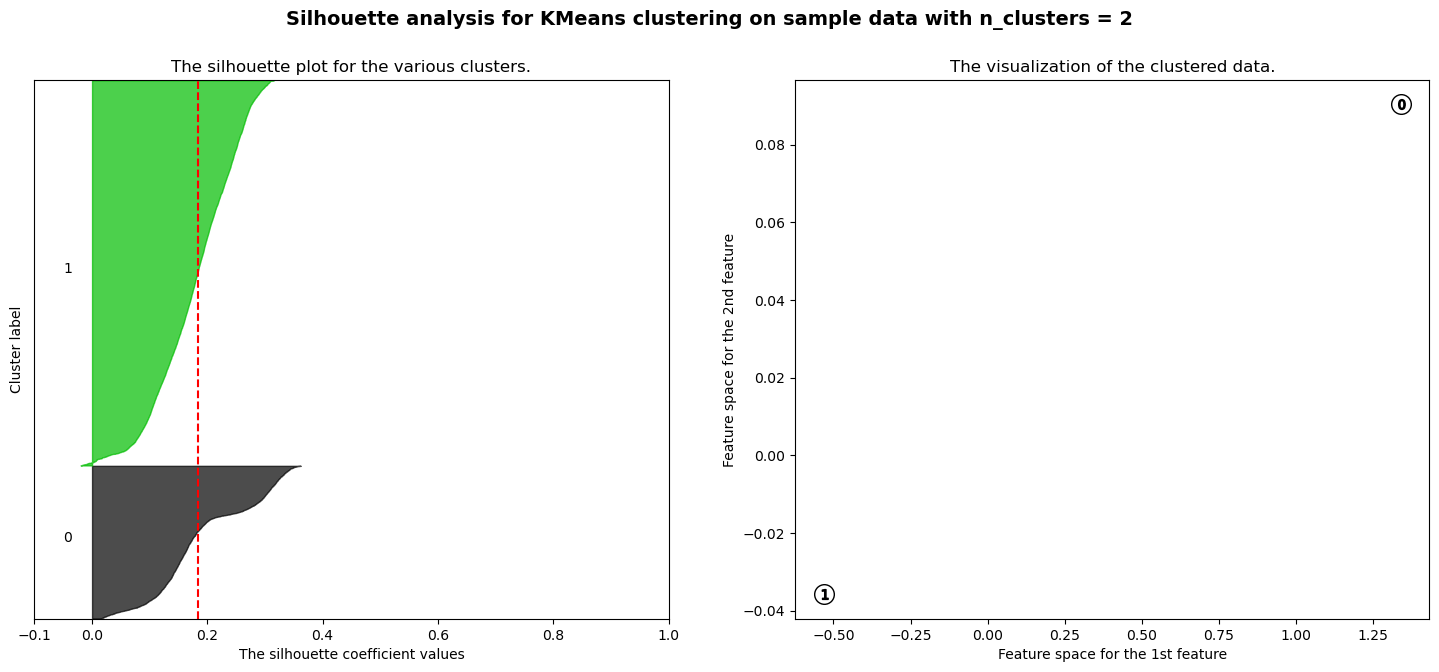

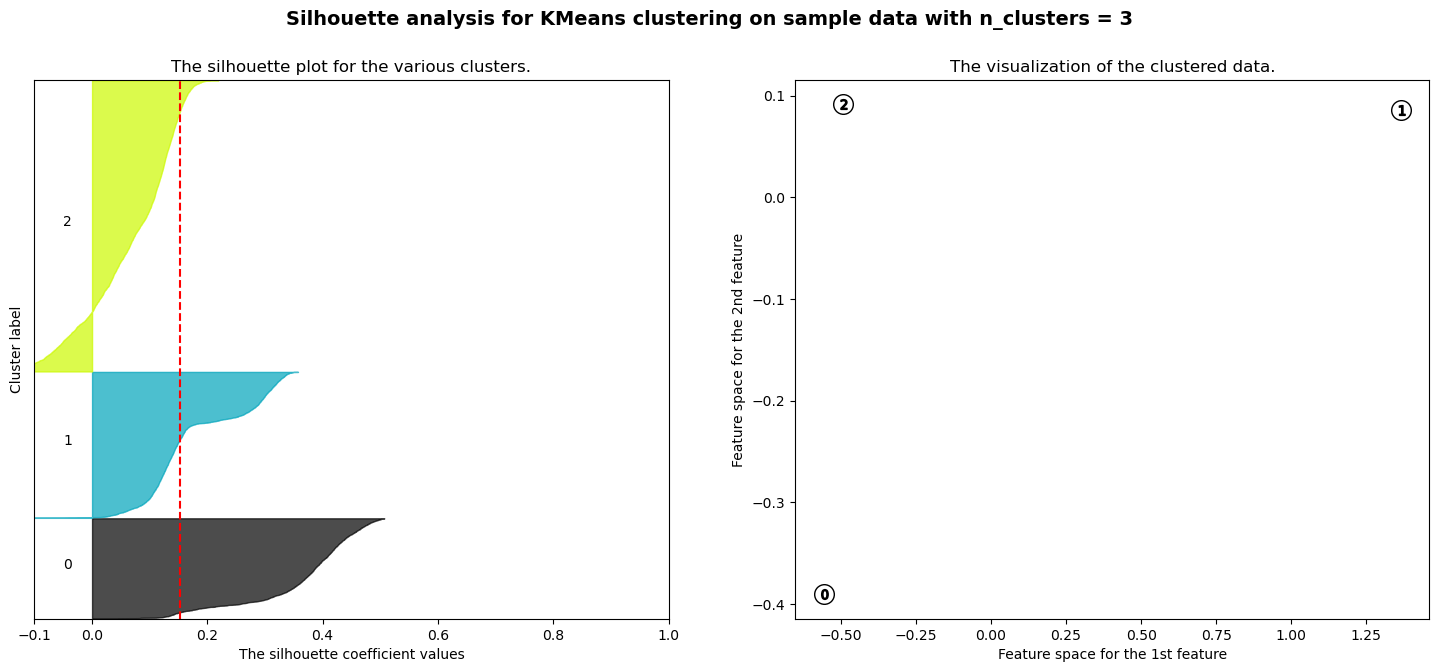

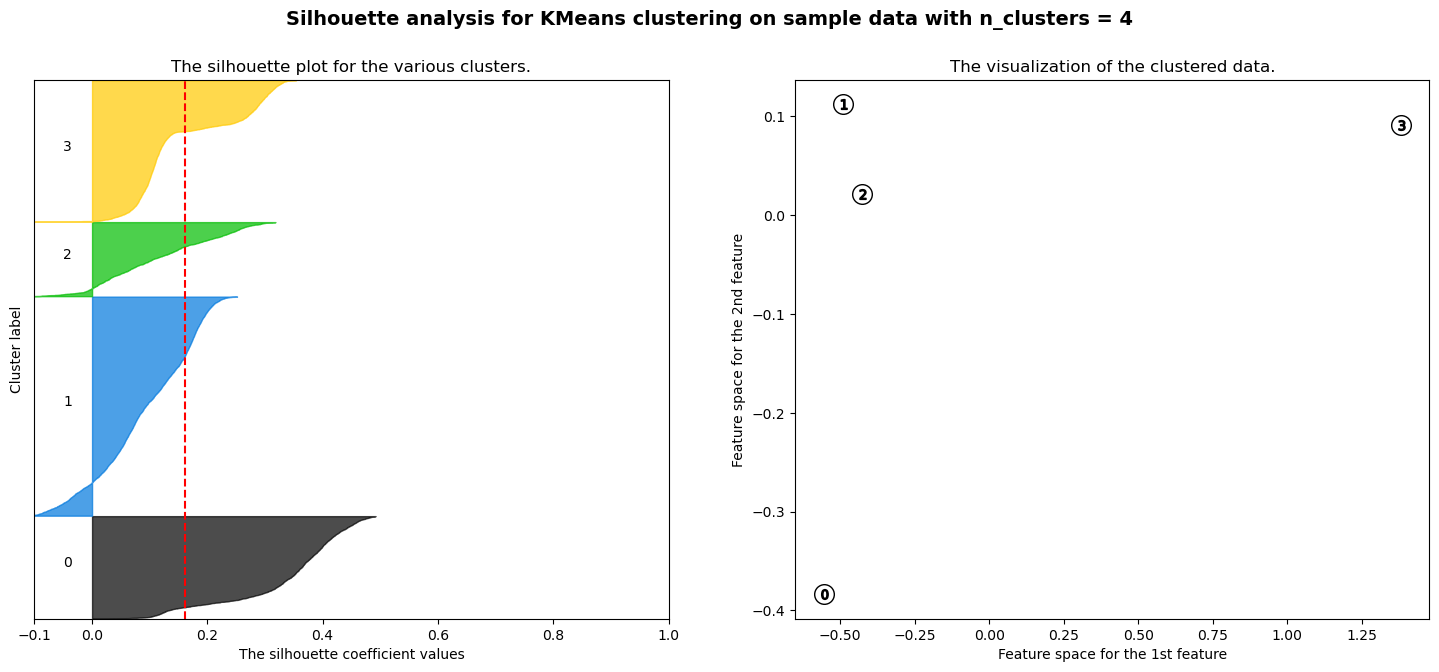

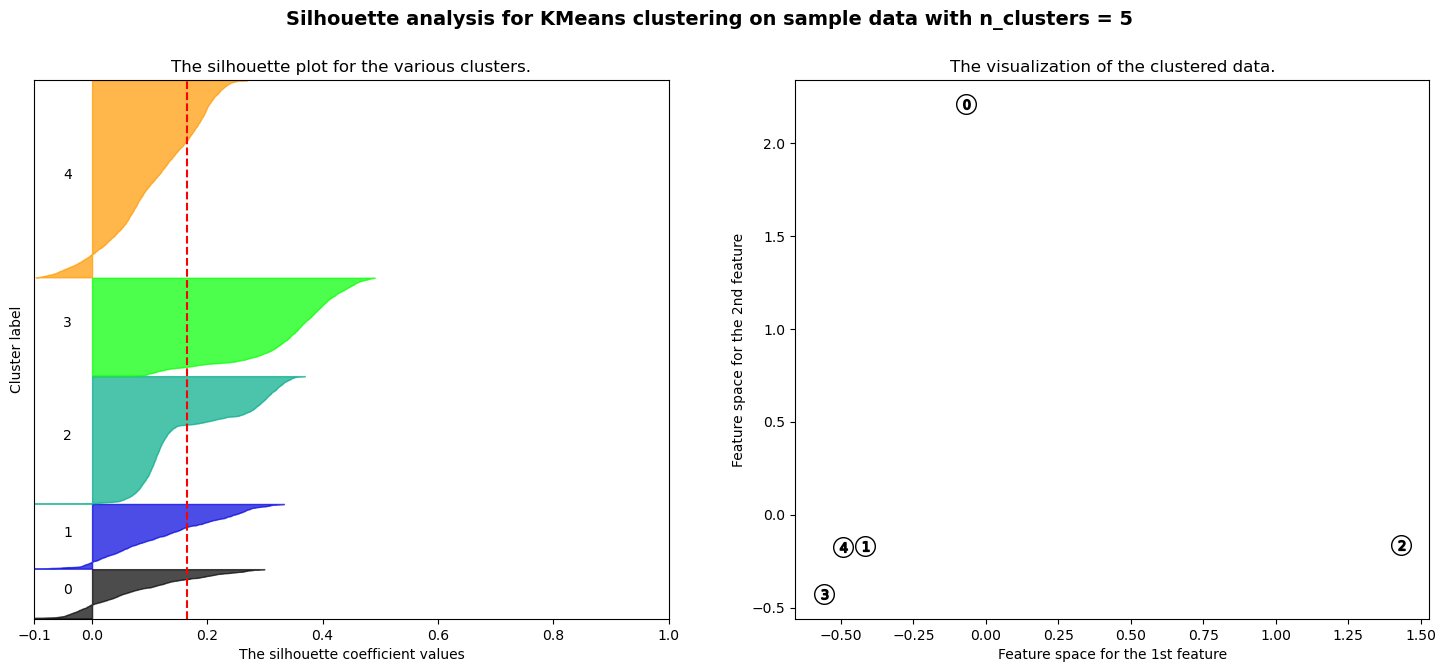

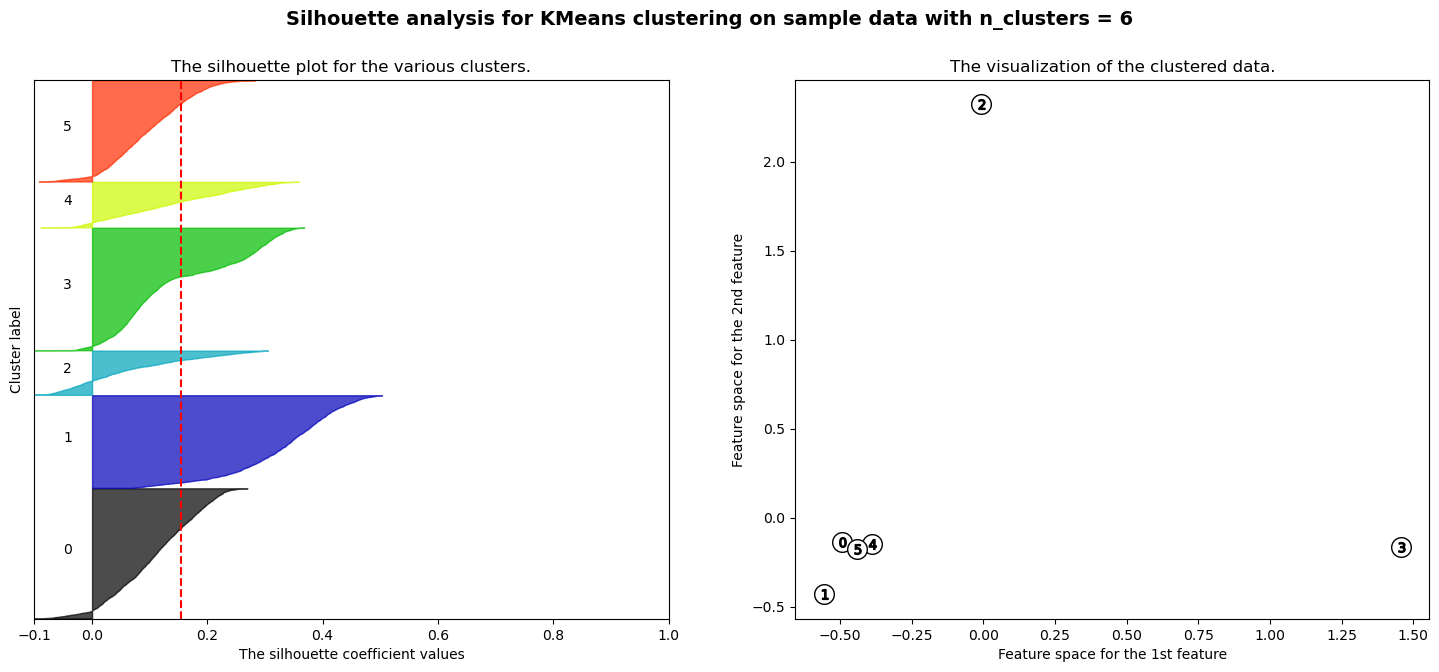

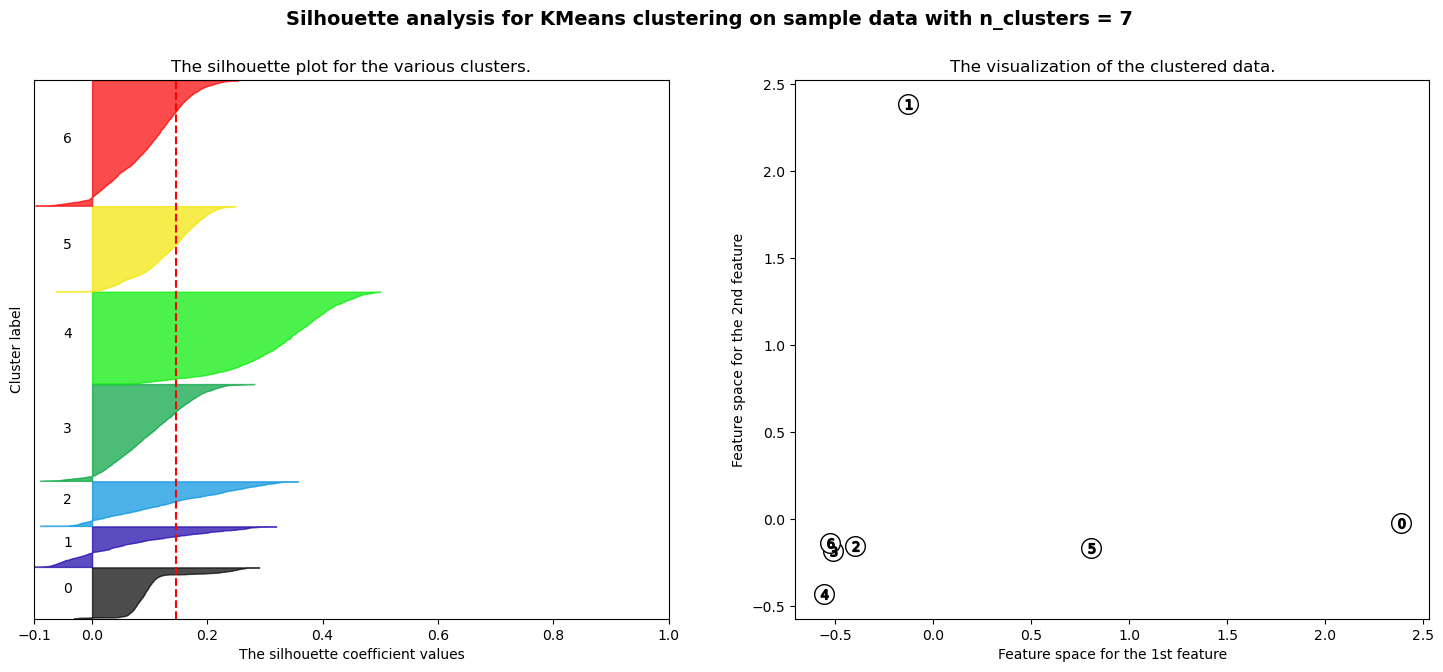

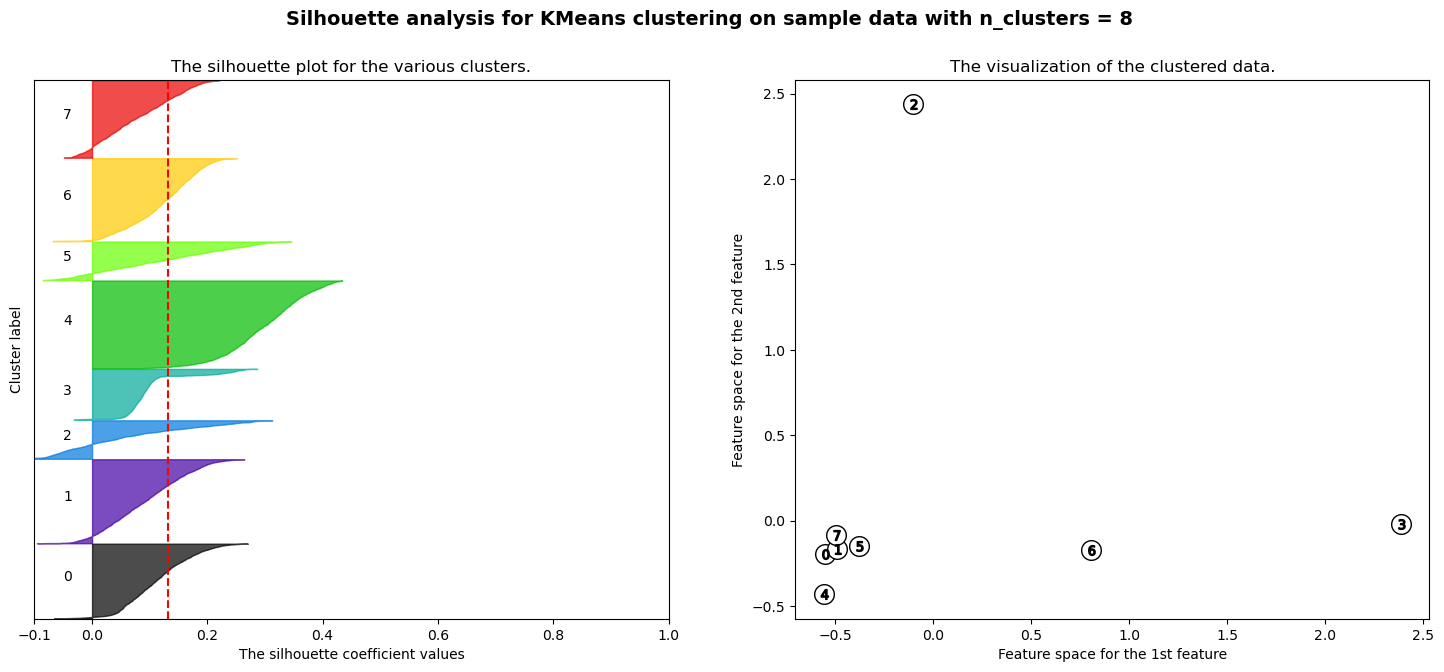

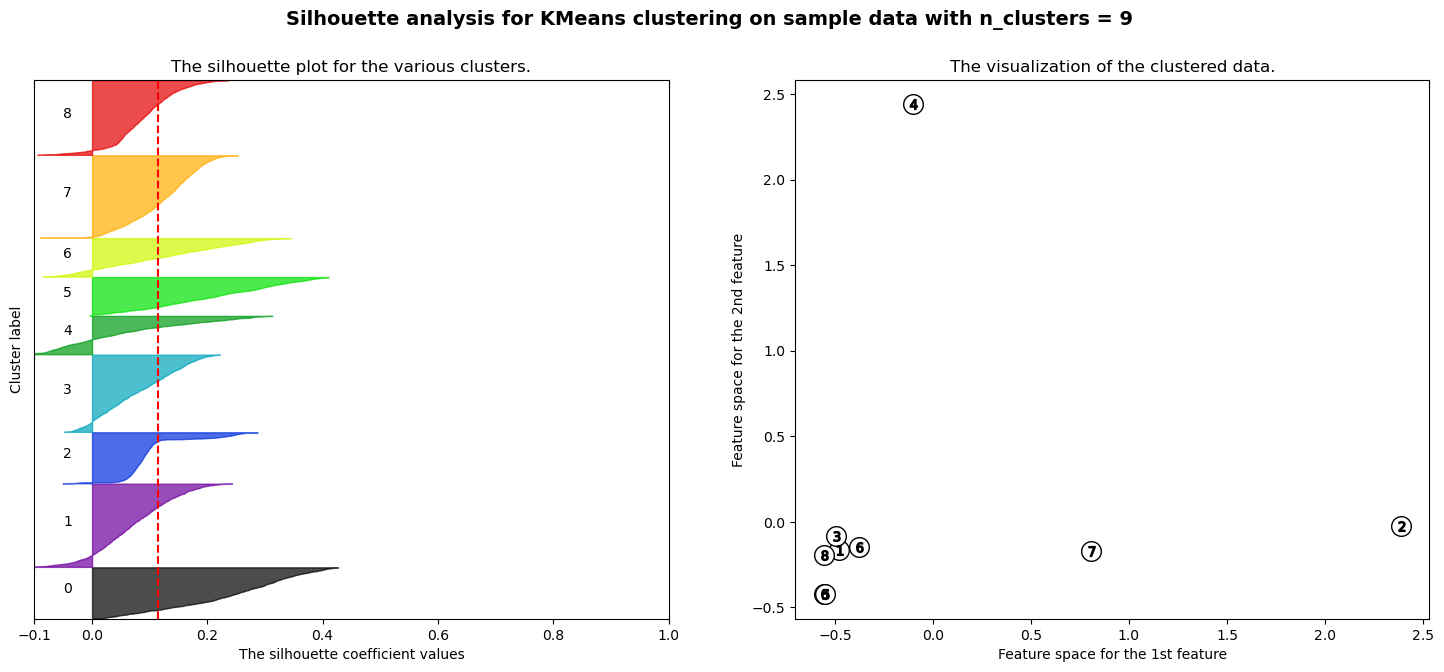

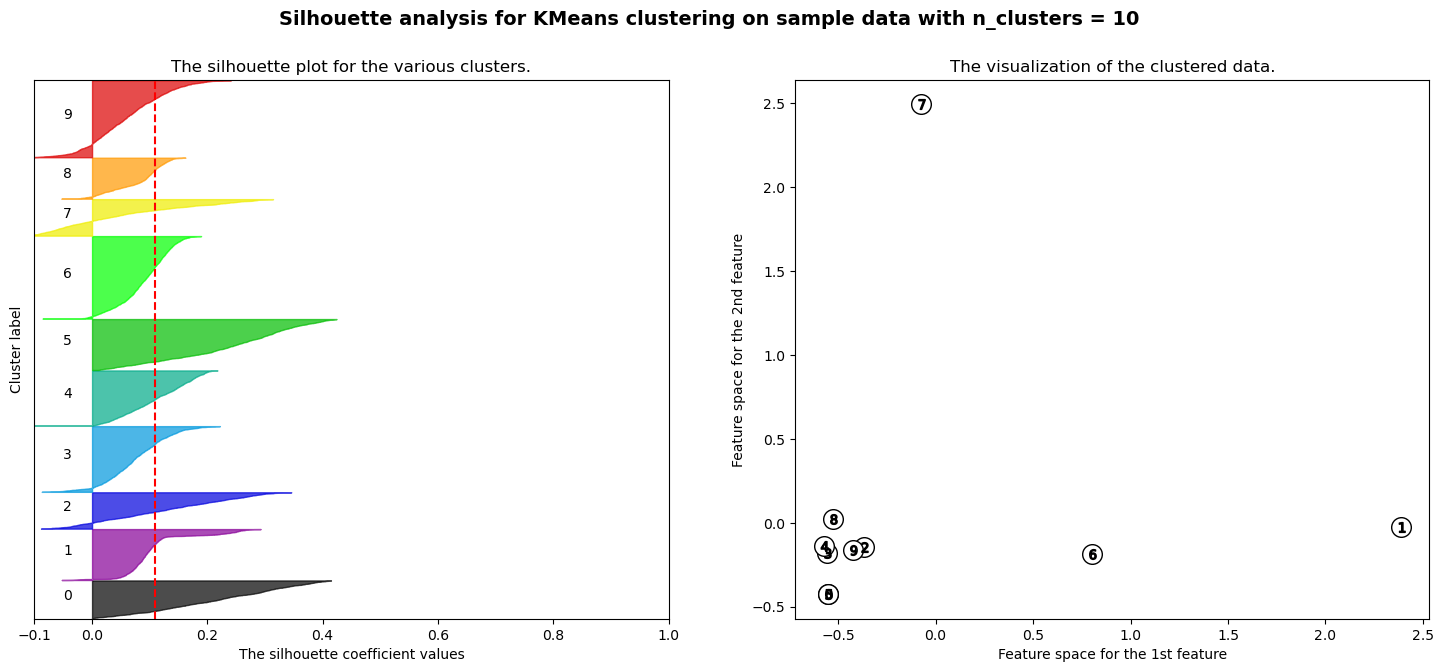

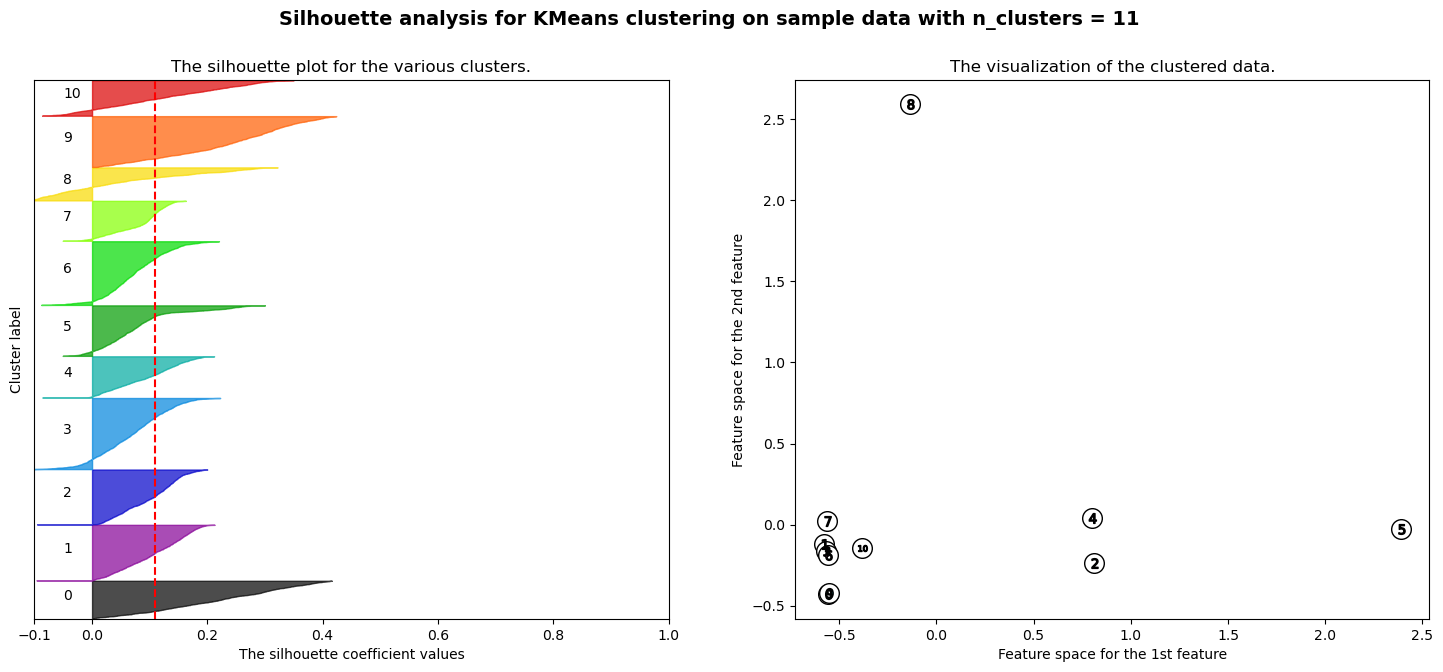

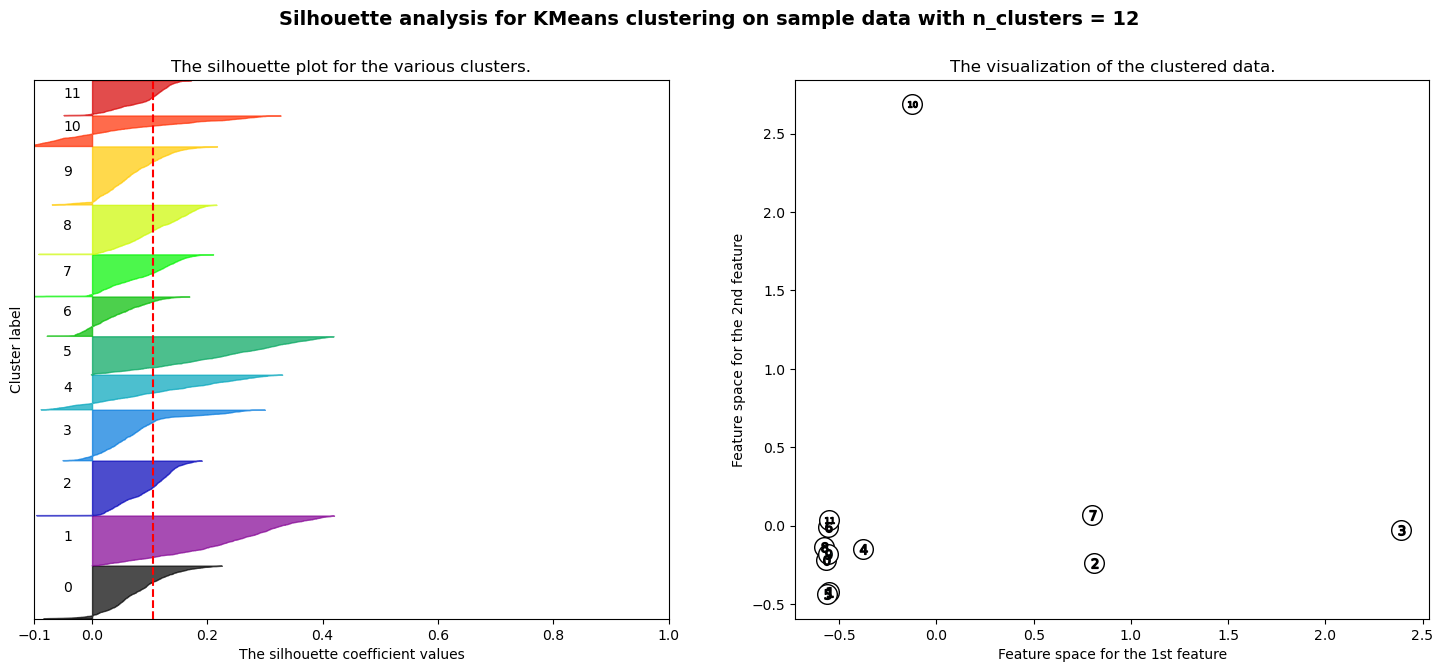

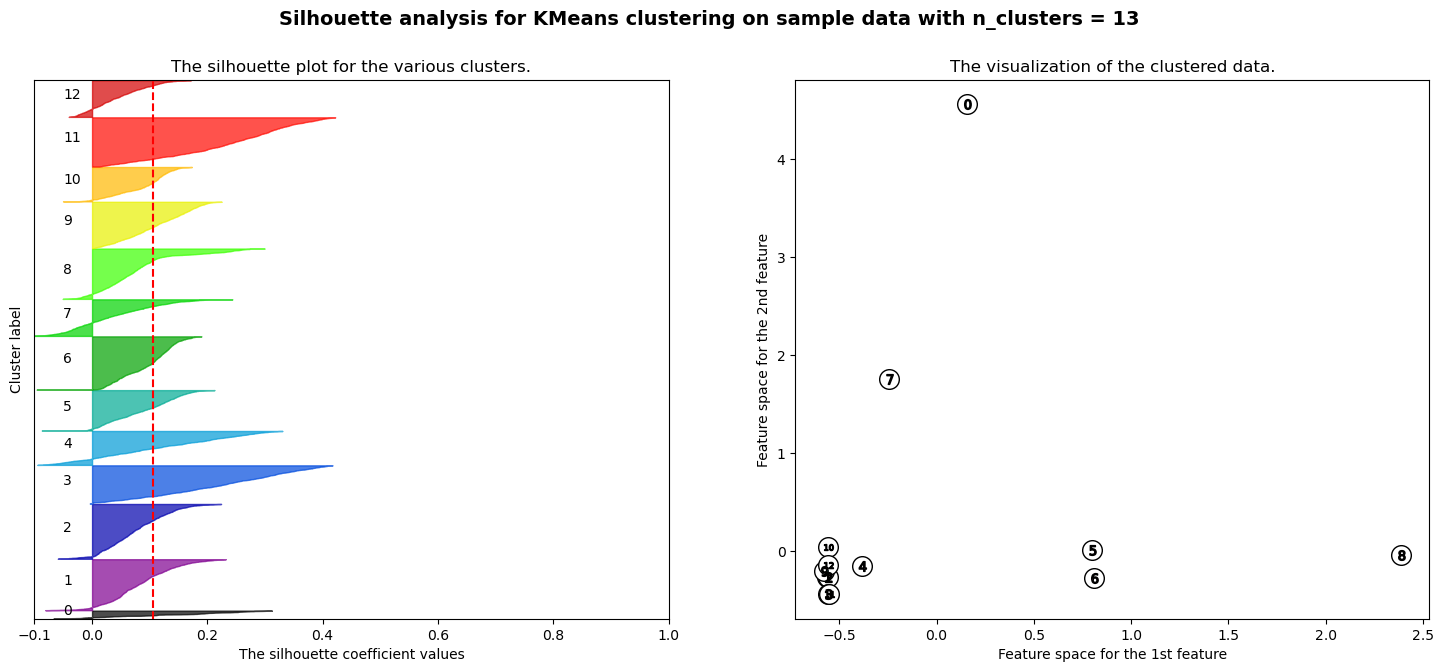

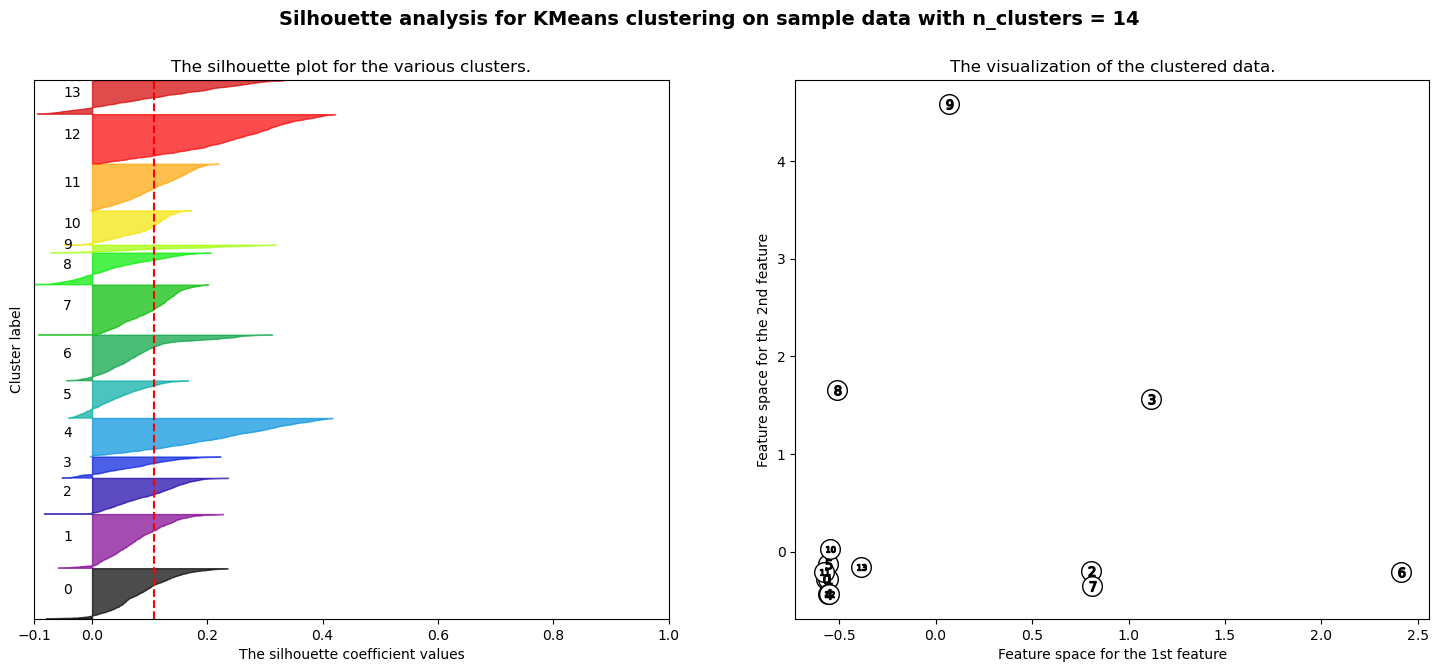

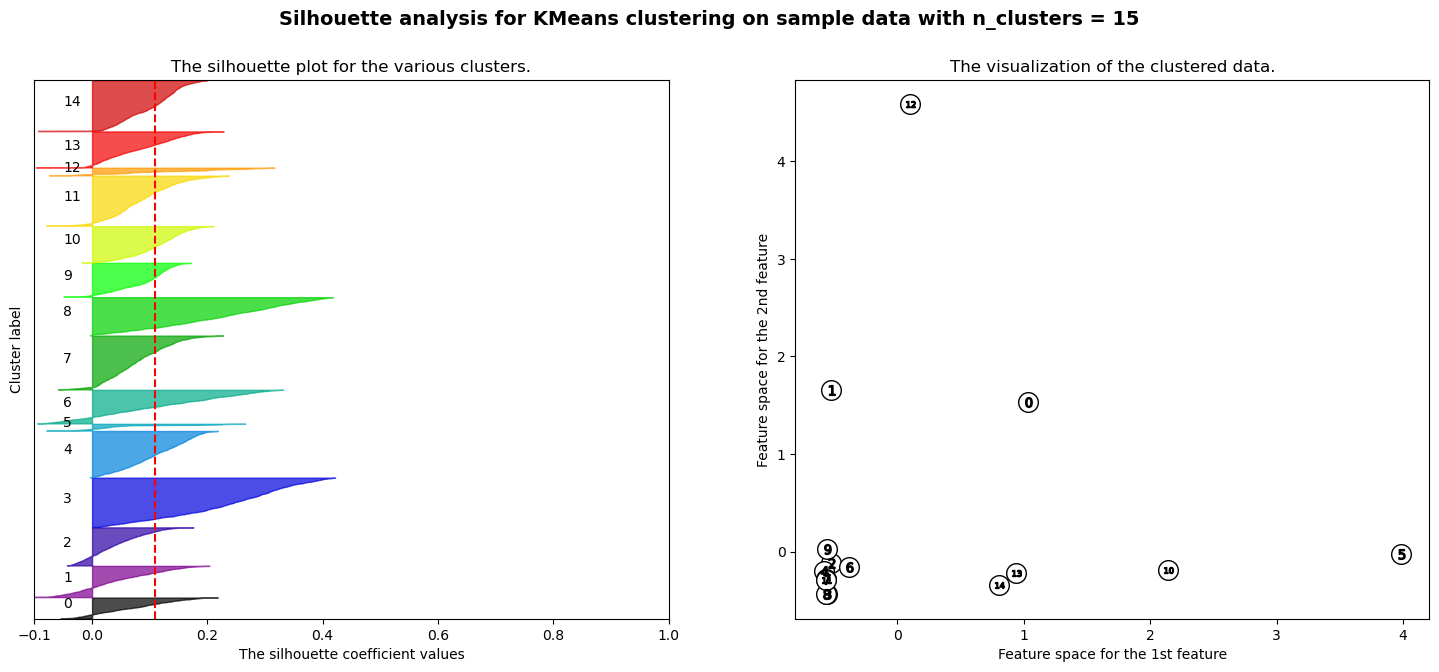

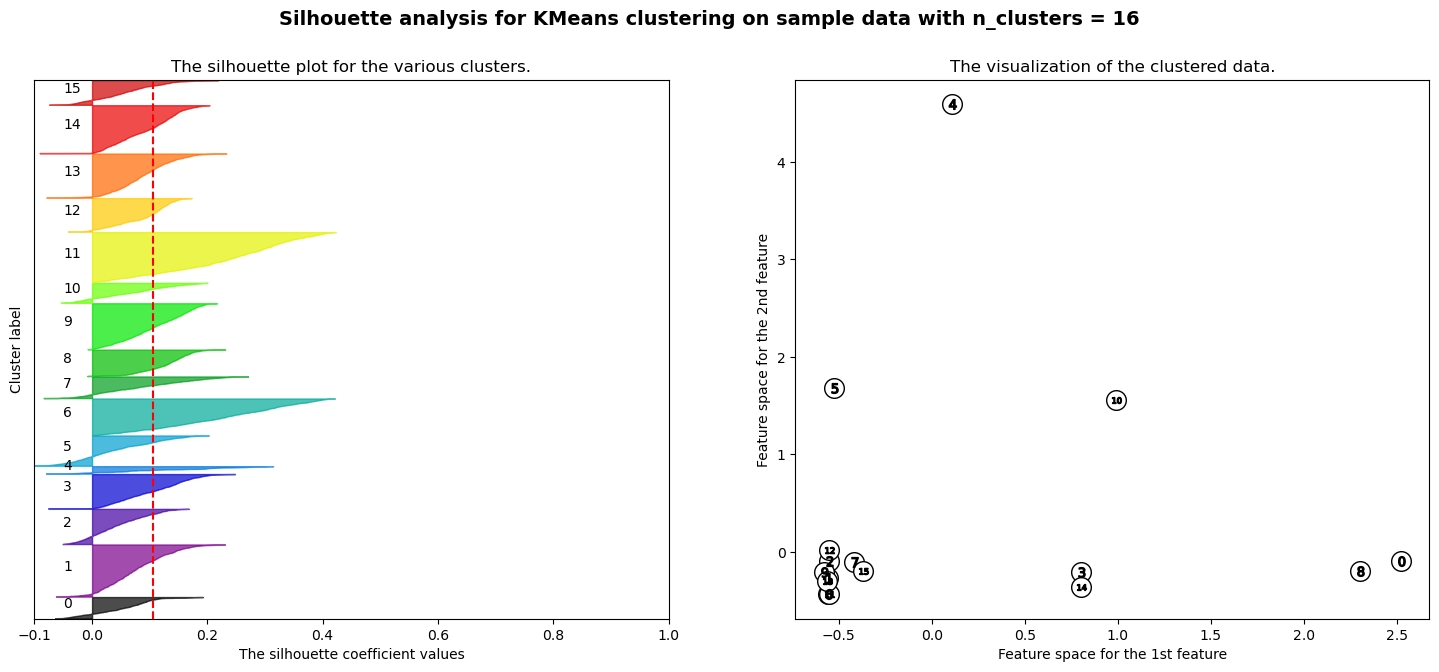

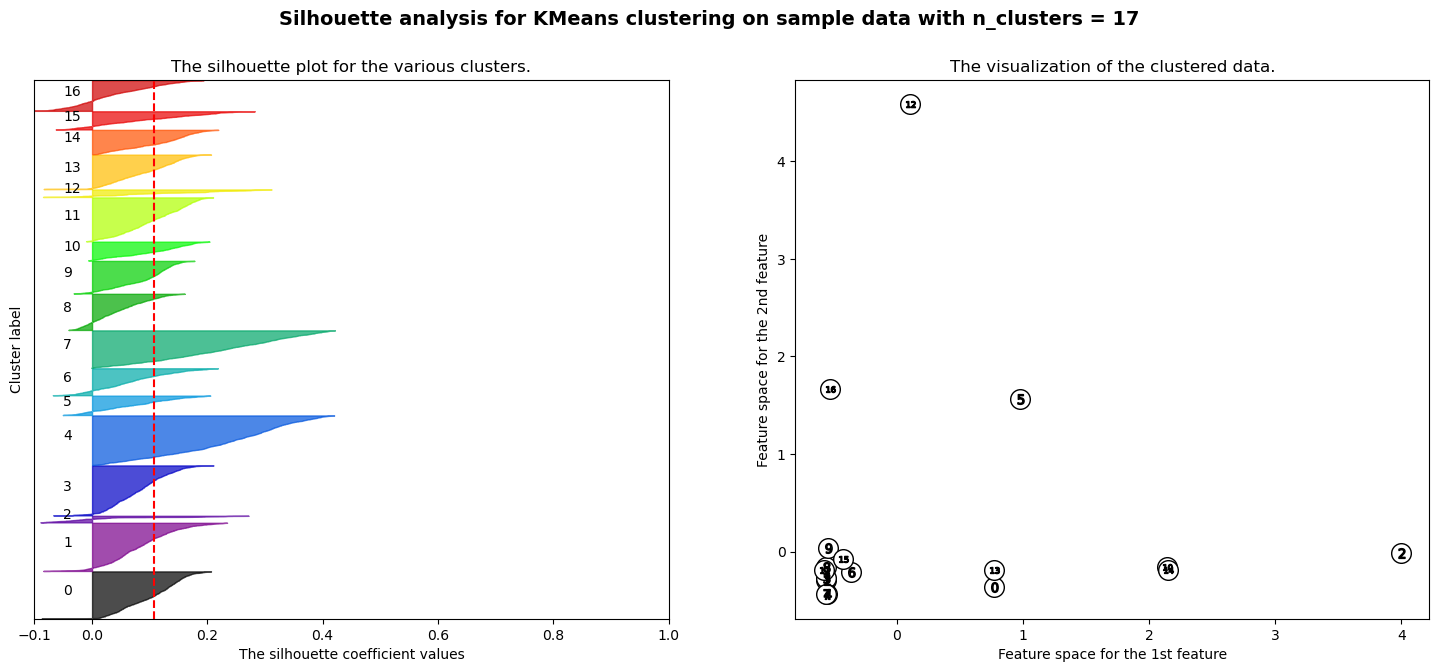

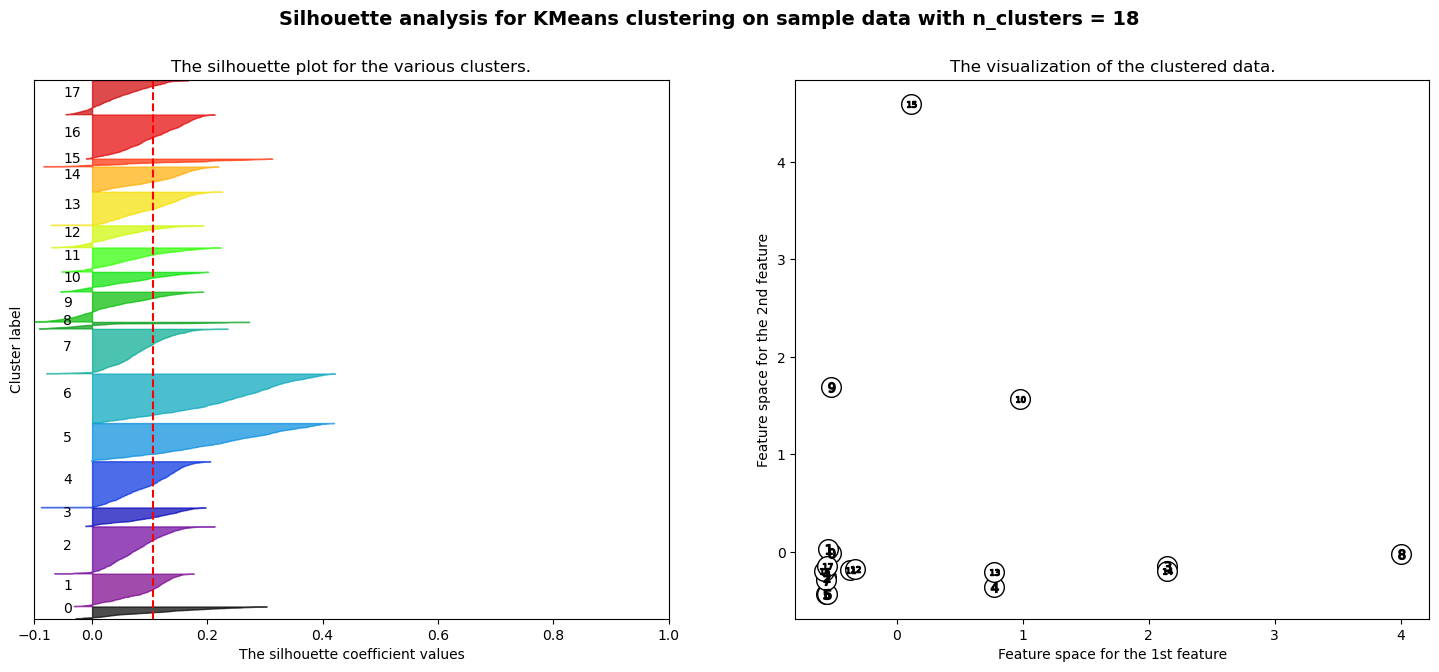

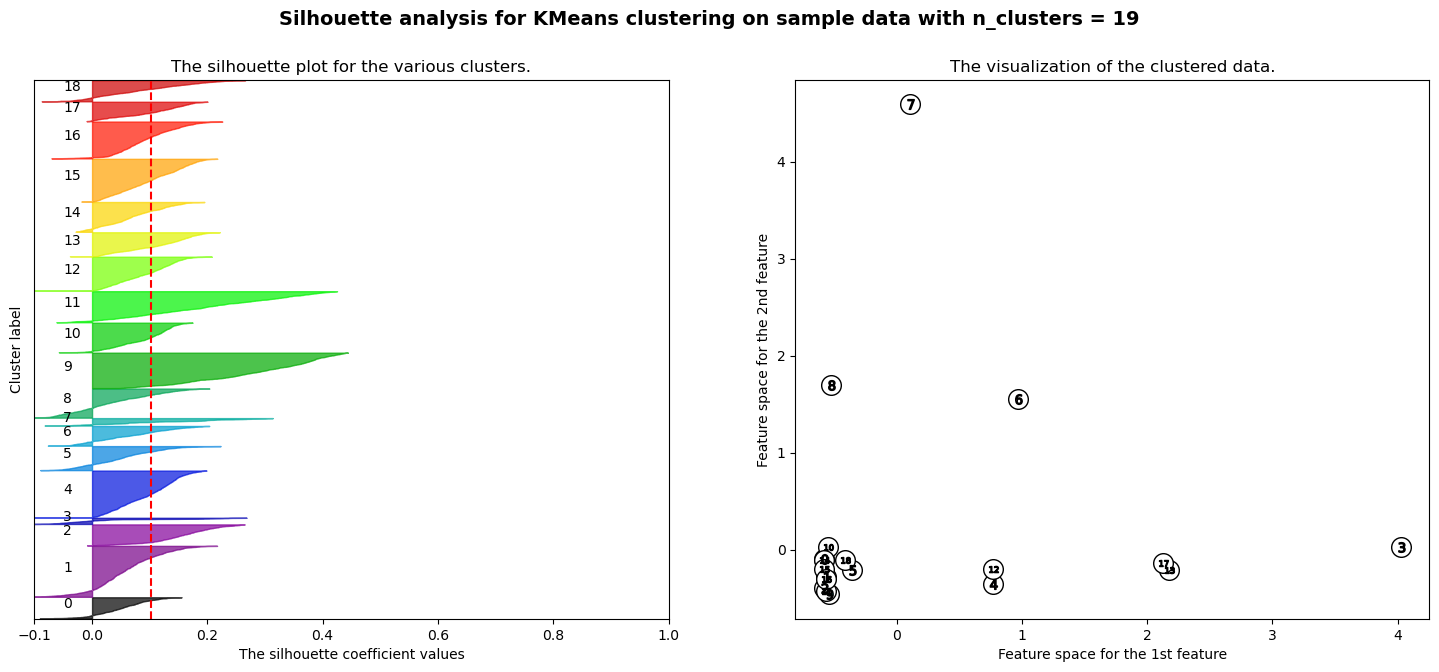

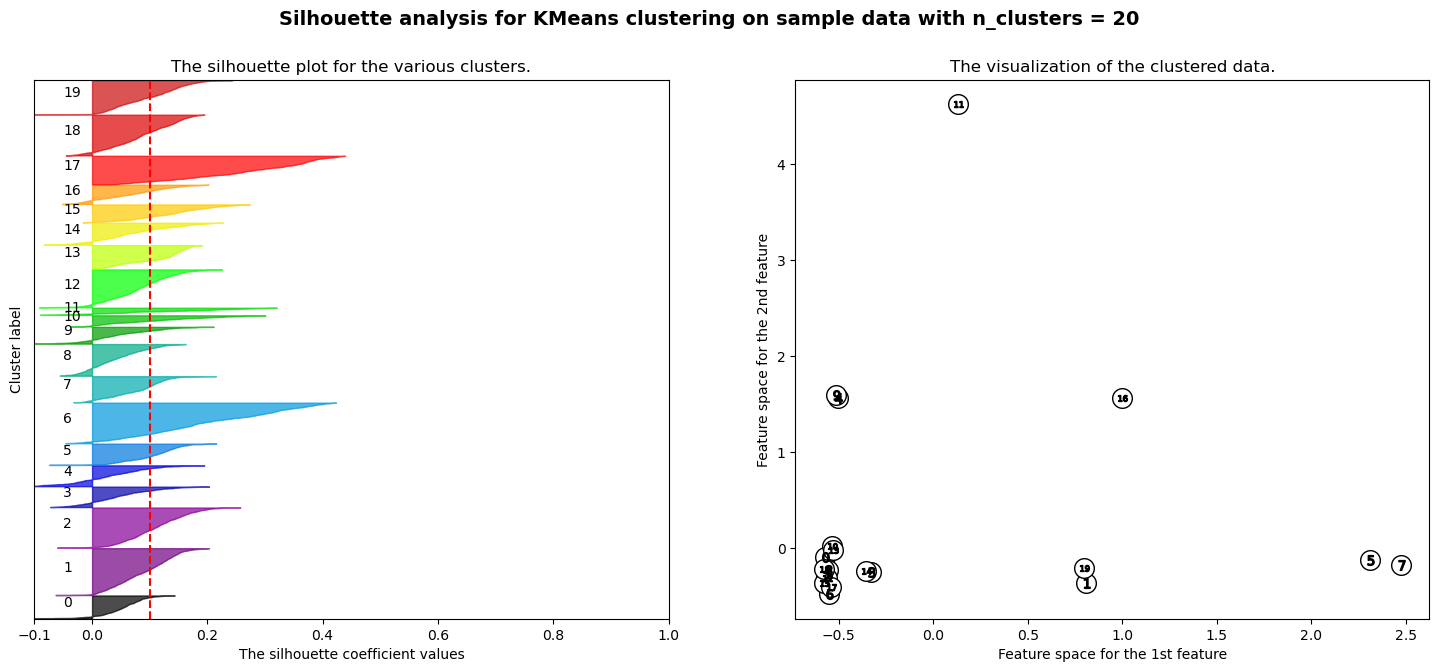

In [145]:
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()